# CIC-MalMem-2022 Answer File

### Author: Ruba Al Omari (change this to your name in your submission)

**CIC-MalMem-2022 Original Dataset Source:  University of New Brunswick | UNB - Canadian Institute for Cybersecurity . https://www.unb.ca/cic/datasets/malmem-2022.html**


**CIC-MalMem-2022 Modified Dataset: https://raw.githubusercontent.com/rubaomari/mal/refs/heads/main/CIC-MalMem-2022-Modified-RA.csv**

In [660]:
#import libraries
#you can install missing libraries using pip install, example: pip install numpy 

import sklearn
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Tip: If you get future warnings you can ignore them using:

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Task 1-Exploratory Data Analysis 

<span style="color: yellow;">15 Marks, 3 marks per step from step1 to step5</span>


Load the dataset using Pandas into a DataFrame, which is the object Pandas uses to store tables of data.
Pandas uses two objects for storing datasets: the DataFrame and the Series. 
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

### 1. Load the dataset

In [661]:
#load the dataset
url = "https://raw.githubusercontent.com/rubaomari/mal/refs/heads/main/CIC-MalMem-2022-Modified-RA.csv"
malware_df = pd.read_csv(url, sep=',')

#let's create a backup copy of the dataset
malware_df_backup = malware_df.copy()

### 2. Take a quick look at the data structure


#### Use head() to look at the first 5 rows, you can also choose to look at more than the first 5 rows using head(10).


In [662]:
print(malware_df.head())

  Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign            45            17           10.555556   
1   Benign            47            19           11.531915   
2   Benign            40            14           14.725000   
3   Benign            32            13           13.500000   
4   Benign            42            16           11.452381   

   pslist.nprocs64bit  pslist.avg_handlers  dlllist.ndlls  \
0                   0           202.844444           1694   
1                   0           242.234043           2074   
2                   0           288.225000           1932   
3                   0           264.281250           1445   
4                   0           281.333333           2067   

   dlllist.avg_dlls_per_proc  handles.nhandles  handles.avg_handles_per_proc  \
0                  38.500000              9129                    212.302326   
1                  44.127660             11385                    242.234043   
2                  4

#### Use describe() method to see a summary of the numerical attributes.

In [663]:
print(malware_df.describe())

       pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
count  58596.000000  58596.000000        58589.000000             58596.0   
mean      41.394771     14.713837           11.341492                 0.0   
std        5.777249      2.656748            1.588203                 0.0   
min       21.000000      8.000000            1.650000                 0.0   
25%       40.000000     12.000000            9.972973                 0.0   
50%       41.000000     15.000000           11.000000                 0.0   
75%       43.000000     16.000000           12.861858                 0.0   
max      240.000000     72.000000           16.818182                 0.0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
count         58596.000000   58596.000000               58596.000000   
mean            247.509819    1810.805447                  43.707806   
std             111.857790     329.782639                   5.742023   
min              3

#### Use info() to get a quick description of the data, the total number of rows, each attribute’s type, and the number of non-null values.

The original dataset from UNB doesn't have any missing values. I have randomly removed values so we can discuss what to do with missing data.

In [664]:
print(malware_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58594 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58589 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

#### Use value_counts to show what categories exist and how many rows belong to each Category and to each Class

In [665]:
class_values = malware_df["Class"].value_counts()

In [666]:
print(class_values)

Class
Benign     29298
Malware    29298
Name: count, dtype: int64


### 3. Plot a pie of the data classes

([<matplotlib.patches.Wedge at 0x166a5122850>,
 [Text(-4.8082529002048655e-08, 1.099999999999999, 'Benign'),
  Text(1.311736850028664e-08, -1.0999999999999999, 'Malware')],
 [Text(-2.6226834001117445e-08, 0.5999999999999994, '50.0%'),
  Text(7.1549282728836204e-09, -0.5999999999999999, '50.0%')])

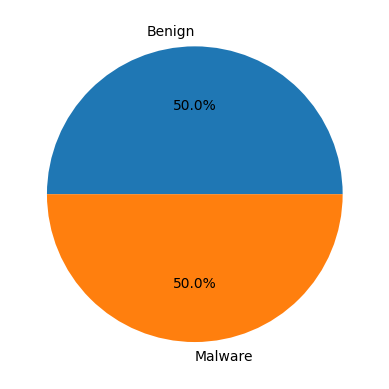

In [667]:
psudo_comment = "based on https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py"
plt.pie(class_values, labels=class_values.index, autopct='%1.1f%%')

### 4. Plot a a histogram of the features

<function matplotlib.pyplot.show(close=None, block=None)>

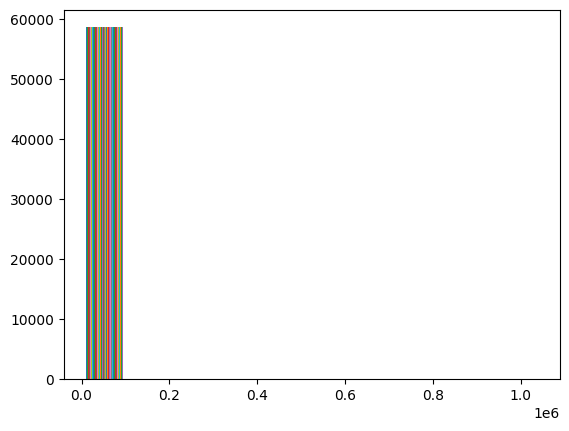

In [668]:
plt.hist(malware_df.select_dtypes(include=['number']))
plt.show

### 5. Look for correlations using Pearson correlation coefficient.

In [669]:
#we only want to look at numerical features for Pearson correlation. 
print(malware_df.corr(numeric_only = True))


                                        pslist.nproc  pslist.nppid  \
pslist.nproc                                1.000000      0.485450   
pslist.nppid                                0.485450      1.000000   
pslist.avg_threads                         -0.208977     -0.726754   
pslist.nprocs64bit                               NaN           NaN   
pslist.avg_handlers                        -0.004850     -0.224777   
dlllist.ndlls                               0.567111     -0.094653   
dlllist.avg_dlls_per_proc                  -0.006901     -0.594012   
handles.nhandles                            0.207611     -0.093094   
handles.avg_handles_per_proc                0.021915     -0.160602   
handles.nport                                    NaN           NaN   
handles.nfile                               0.025362     -0.014648   
handles.nevent                              0.439907     -0.284957   
handles.ndesktop                            0.797257      0.440202   
handles.nkey        

# Task 2-Prepare the Data for ML Algorithms

<span style="color: yellow;">24 Marks, 3 marks per step from step6 to step13</span>

### 6. Extract malware category and malware family from the unique identifiers.


In [670]:
#will seperate Category as follows Spyware-180solutions-0f3f46bebdfc -> Spyware, 180solutions, 0f3f46bebdfc-2.raw
#only the first two values (spyware/180solutions) for example above will be saved
splitCols = malware_df["Category"].str.split(pat="-",n=2,expand=True)[[0,1]]

#name the columns
splitCols.columns = ["MalwareCategory","MalwareFamily"]

#"from: https://stackoverflow.com/questions/31295740/how-to-replace-none-only-with-empty-string-using-pandas"
splitCols.fillna("Benign",inplace=True)

#adds the new columns to the dataframe
malware_df = malware_df.join(splitCols)



In [671]:
#run the code below to see your extraction succeeded, the name of your dataframe might be different.
print(malware_df.columns)
malware_df.head()

Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxv

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class,MalwareCategory,MalwareFamily
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,24,116,0,121,87,0,8,Benign,Benign,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,24,118,0,122,87,0,8,Benign,Benign,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,27,118,0,120,88,0,8,Benign,Benign,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,27,118,0,120,88,0,8,Benign,Benign,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,24,118,0,124,87,0,8,Benign,Benign,Benign


### 7. Check for duplicate rows, and remove them if any.

In [672]:
#"from: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/"
dups = malware_df[malware_df.duplicated()]
print(dups)

                                                Category  pslist.nproc  \
603                                               Benign            40   
888                                               Benign            42   
1505                                              Benign            39   
2845                                              Benign            43   
2863                                              Benign            42   
...                                                  ...           ...   
40755  Spyware-Gator-1cf7f77c2a5f81862bd1c781c3873ab7...            40   
40757  Spyware-Gator-1cf7f77c2a5f81862bd1c781c3873ab7...            39   
40759  Spyware-Gator-1cf7f77c2a5f81862bd1c781c3873ab7...            38   
40761  Spyware-Gator-1cf7f77c2a5f81862bd1c781c3873ab7...            37   
40763  Spyware-Gator-1cf7f77c2a5f81862bd1c781c3873ab7...            37   

       pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
603              12           13.275000         

In [673]:
malware_df = malware_df.drop_duplicates()

### 8. Handle the missing values
we will handle the missing values in the preprocessing pipeline, but for now let's have a look to see if we have missing values.

In [674]:
#from: https://www.atlassian.com/data/notebook/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe
malware_df.isnull().values.any()

np.True_

For the missing values, we will fill the mean if it is a numerical column and the most frequent if it is a categorical column.

We will do this through creating a pipeline, that will also scale the features and perform encoding in the next step.




### 9. Drop Category, pslist.nprocs64bit, handles.nport, and svcscan.interactive_process_services features

**Note** You can also drop columns with a specific percent of missing values, for example the below command will drop columns that has 70% (or more) missing values

    - dataset.dropna(axis='columns', thresh=int(0.7* df.shape[0]))

In [675]:
malware_df = malware_df.drop(columns=['Category','pslist.nprocs64bit', 'handles.nport','svcscan.interactive_process_services'])



### 10. Create and apply a preprocessing pipeline:

1. Fill in the missing numerical values with the mean using a SimpleImputer

2. Scale the numerical columns using StandardScaler.

3. Fill in the missing categorical values with the most_frequent value using SimpleImputer

In [676]:
#create the pipleline

#get names for the numerical columns
numericalCols = malware_df.select_dtypes(include=['number']).columns

#get catagorical columns Note: in our dataframe the catagorical values are stored as objects
categoricalCols = malware_df.select_dtypes(include=['category','object']).columns

#make the piplines
pipeForNumerical = make_pipeline(StandardScaler(),SimpleImputer())
pipeForCatagorical = make_pipeline(SimpleImputer(strategy='most_frequent'))

#put them together
completePreprocessor = ColumnTransformer(
    transformers=[
        ("numerical", pipeForNumerical, numericalCols),
        ("catagorical", pipeForCatagorical, categoricalCols),
    ],
    remainder='passthrough'
)


In [677]:
#apply the pipeline
colNames = malware_df.columns 
#note: the below line removes the column names. Therefore we name to save the column names and then add them back
malware_df = pd.DataFrame(completePreprocessor.fit_transform(malware_df))
malware_df.columns = colNames



### 11. Display your pipeline

In [678]:
completePreprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc',
       'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nfile',
       'ha...
       'modules.nmodules', 'svcscan.nservices', 'svcscan.kernel_drivers',
       'svcscan.fs_drivers', 'svcscan.process_services',
       'svcscan.shared_process_services', 'svcscan.nactive',
       'callbacks.ncallbacks', 'callbacks.nanonymous', 'callbacks.ngeneric'],
      dtype='object')),
                                ('catagorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 Index(['Class', 'MalwareCategory', 'MalwareFamily'], dtype='object'))])

### 12. Print your dataframe .shape()

In [679]:
malware_df.shape

(58062, 55)

### 13. Make a backup copy of your dataframe 

In [680]:
malware_df_backup = malware_df.copy()


# Task 3-Select a Model and Train it to Predict Class
<span style="color: yellow;">12 Marks, 3 marks per step from step14 to step17</span>

<span style="color: yellow;">5 Marks for step18</span>

### 14. Drop the MalwareFamily and MalwareCategory features, and use Class as your target.

In [681]:
malware_df = malware_df.drop(columns=["MalwareFamily","MalwareCategory"])

target = malware_df["Class"]
malware_df = malware_df.drop(columns=["Class"])

### 15. Split the dataset into a training dataset (80%) and testing dataset.

In [682]:
X_train, X_test, y_train, y_test = train_test_split(malware_df, target, train_size=0.8, test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(46449, 52) (11613, 52) (46449,) (11613,)


### 16. Train a svm classifier (svc) to predict the class of the file, whether it is Benign or Malware on the training set using: kernel = rbf, gamma = 1, and C =1. 

In [683]:
#note: "rbf" is kernels default value
svmClassifier = SVC(gamma = 1, C = 1)

#train model
svmClassifier.fit(X_train,y_train)

SVC(C=1, gamma=1)

### 17. Test your model on the X_Test, and report the classification_report on the y_test and y_predict.

In [684]:
#test it using the test data retrived previously
y_predict = svmClassifier.predict(X_test)

#see results of test
print(classification_report(y_test, y_predict))




              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5837
     Malware       1.00      1.00      1.00      5776

    accuracy                           1.00     11613
   macro avg       1.00      1.00      1.00     11613
weighted avg       1.00      1.00      1.00     11613



### 18. Plot the confusion matrix of your test results using ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

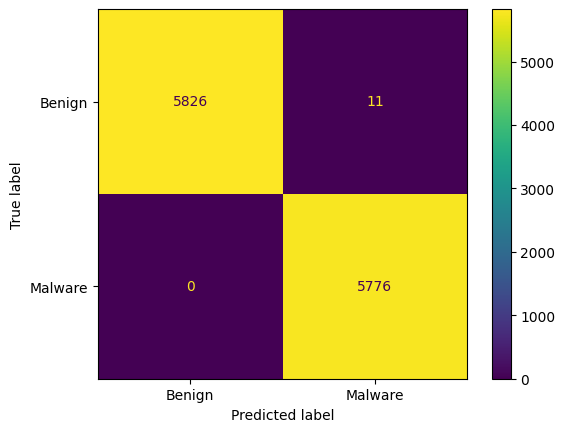

In [685]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

# Task 4-Hyperparameters Fine Tuning

<span style="color: yellow;">9 Marks, 3 marks per step from step19 to step21</span>


### 19. Use GridSearchCV to find the best value of C: [0.1, 1, 10], and print out the grid_search.best_params_

In [686]:
#assumtion: using values from previous step for gamma and kernal 
svmForGrid = SVC(gamma = 1)

#train/test for each value of C. 
gridSearch = GridSearchCV(estimator=svmForGrid, param_grid={'C': [0.1, 1, 10]}, scoring='accuracy')
gridSearch.fit(malware_df, target)

#this will be the value with the best accuracy during training
print(gridSearch.best_params_)


{'C': 10}


### 20. Train 2 other classifiers of your choice, one of which is a neural network.

In [687]:
#Multi-layer Perceptron classifier

#train
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

#test
y_predict1 = mlp.predict(X_test)



#logistic regression

#train
LR = LogisticRegression()
LR.fit(X_train, y_train)

#test
y_predict2 = LR.predict(X_test)






### 21. Compare the results of the three classifiers in a table. Include Accuracy, F1-Score, Precision and Recall.

The table below is showing the first row only, your table should should show three rows, one for each classifier

| Classifier | Precision | Recall | Accuracy | F1-Score |
|------------|-----------|--------|----------|----------|
|   Svm Classifier  |  1  | 1| 0.998  | 1  |
|   Logistic Regression  |  1 | 1 | 0.999  | 1 |
|   Multi-layer Perceptron classifier  |  1 | 1| 0.999  | 1  |


# Task 5-Predict Malware Category

<span style="color: yellow;">10 Marks for step 23</span>

### 22.	Revert back to the malware_df_prepared_backup dataset you saved in step 13. 

In [688]:
malware_df = malware_df_backup.copy()


### 23.	Repeat Task 3, but this time drop Class and MalwareFamily, and use MalwareCategory as your target. 
Do it all (steps 14 to 18) in a single code cell below

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5782
  Ransomware       0.57      0.52      0.55      1929
     Spyware       0.65      0.63      0.64      1947
      Trojan       0.60      0.67      0.63      1955

    accuracy                           0.80     11613
   macro avg       0.71      0.71      0.70     11613
weighted avg       0.80      0.80      0.80     11613



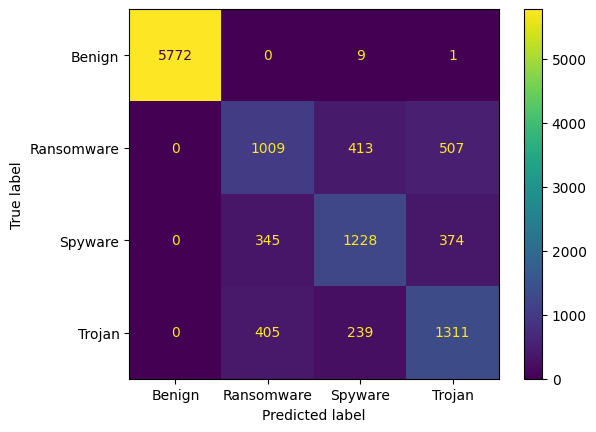

In [689]:
malware_df = malware_df.drop(columns=["MalwareFamily","Class"])

target = malware_df["MalwareCategory"]
malware_df = malware_df.drop(columns=["MalwareCategory"])

#split data into train/test data
X_train, X_test, y_train, y_test = train_test_split(malware_df, target, train_size=0.8, test_size=0.2)

#train classifier
svmClassifier = SVC(gamma = 1, C = 1)
svmClassifier.fit(X_train,y_train)

#test classifier
y_predict = svmClassifier.predict(X_test)

#show results
print(classification_report(y_test, y_predict))
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)



# Task 6-Predict Malware Family

<span style="color: yellow;">10 Marks for step 25</span>

### 24.	Revert back to the malware_df_prepared_backup dataset you saved in step 13. 

In [690]:
malware_df = malware_df_backup.copy()

### 25.	Repeat Task 3, but this time drop Class and MalwareCategory, and use MalwareFamily as your target.
Do it all (steps 14 to 18) in a single code cell below

              precision    recall  f1-score   support

180solutions       0.24      0.22      0.23       391
         Ako       0.33      0.18      0.24       423
      Benign       0.97      1.00      0.98      5799
         CWS       0.29      0.17      0.21       390
       Conti       0.23      0.22      0.22       375
      Emotet       0.27      0.33      0.30       403
       Gator       0.50      0.51      0.50       409
        Maze       0.39      0.27      0.32       352
        Pysa       0.34      0.13      0.19       333
     Reconyc       0.38      0.26      0.31       328
     Refroso       0.42      0.56      0.48       439
        Scar       0.32      0.37      0.34       385
       Shade       0.30      0.31      0.30       413
        TIBS       0.81      0.46      0.59       275
 Transponder       0.26      0.40      0.31       483
        Zeus       0.27      0.37      0.31       415

    accuracy                           0.66     11613
   macro avg       0.39   

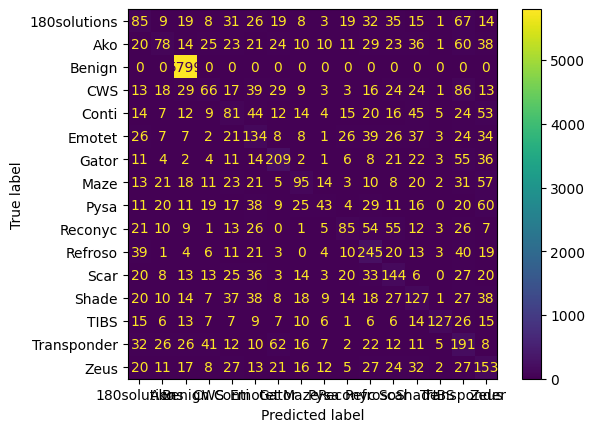

In [691]:
malware_df = malware_df.drop(columns=["MalwareCategory","Class"])

target = malware_df["MalwareFamily"]
malware_df = malware_df.drop(columns=["MalwareFamily"])

#split data into train/test data
X_train, X_test, y_train, y_test = train_test_split(malware_df, target, train_size=0.8, test_size=0.2)

#train classifier
svmClassifier = SVC(gamma = 1, C = 1)
svmClassifier.fit(X_train,y_train)

#test classifier
y_predict = svmClassifier.predict(X_test)

#show results
print(classification_report(y_test, y_predict))
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)


### 26.	Why do you think the accuracy is this low in this task?
<span style="color: yellow;">5 Marks for step 26</span>

<span>---------------------------------------------------------------------------<br></span>
<span>Each malware families of the same catagory i.e. Randsomeware will behave in a very similar way. Therefore there will be alot of overlap among the different fetures when the SVM classifier is appied. To fix this a different model should be tried</span>
<span><br>---------------------------------------------------------------------------</span>

Code Quality and Style
- Code is clearly formatted and adheres to PEP 8 (or your chosen style guide). 
- Variables and functions are named descriptively.
- The code includes clear comments explaining the purpose of code blocks and non-obvious logic.
- Code is structured into modular functions where appropriate. 
- Unnecessary or redundant code is avoided.

<span style="color: yellow;">10 Marks for code quality and style</span>
